In [45]:
from QA_tool import *
import matplotlib.pyplot as plt

In [11]:
fold_root = '/nfs/masi/NLST/ORI_DICOM/NLST_cancer'
save_csv_path = '/nfs/masi/NLST/QA_results/20200513/cancer/dicomQA.csv'
subj_list = os.listdir(fold_root)
sess, single_folder, instanceN, dicomN, diff = [], [], [], [],[]
for i in range(0, len(subj_list)):
    if i > 2: break
    subj_path = fold_root + '/' + subj_list[i]
    sess_list = os.listdir(subj_path)
    for j in range(len(sess_list)):
        sess.append(sess_list[j])
        #print ('(i, j): ',i, j, sess_list[j])
        sess_path = subj_path + '/' + sess_list[j]
        instance_list = os.listdir(sess_path)
        if len(instance_list) == 1:
            single_folder.append(1)
        else:
            single_folder.append(0)
        size_list = []
        for k in range(len(instance_list)):
            print (sess_path + '/' + instance_list[k])

            size = len(os.listdir(sess_path + '/' + instance_list[k]))
            #print (size)
            size_list.append(size)
        max_index = size_list.index(max(size_list))
        try:
            inst_n, dicom_n, same = dcm_instance(sess_path + '/' + instance_list[max_index])
            instanceN.append(inst_n)
            dicomN.append(dicom_n)
            diff.append(same)
        except:
            instanceN.append('')
            dicomN.append('')
            diff.append('')
            print ('dicom error')
data = pd.DataFrame()
data['sess'] = sess
data['single_folder'] = single_folder
data['instanceN'] = instanceN
data['dicomN'] = dicomN
data['dicomN-instanceN'] = diff
data.to_csv(save_csv_path, index = False)

/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-1999-NLST-LSS-60728/2-0OPAGELSQXD3602.5120.00000064.00.11.5-44635
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-1999-NLST-LSS-60728/1-0OPLGELSQXA0na120.0000000.00.0null-60735
max and min of instanceN 168 1
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-2001-NLST-LSS-18357/1-2OPLGELSQXA0na120.0000000.00.0null-26690
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-2001-NLST-LSS-18357/2-2OPAGELSQXD3602.5120.00000064.00.11.5-46297
max and min of instanceN 156 1
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-2000-NLST-LSS-09960/1-1OPLGELSQXA0na120.0000000.00.0null-65544
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-2000-NLST-LSS-09960/2-1OPAGELSQXD3602.5120.00000064.00.11.5-81575
max and min of instanceN 162 1
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/214067/01-02-2001-NLST-ACRIN-42669/2-2OPAGELSPR16BONE3591.21204029.11.4-11740
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/214067/01-02-2001-NLST-ACRIN-42669/3-2OPAGELSPR16STANDARD3591.212040

In [13]:
def sliceDis_fold_NLST(fold_root, save_csv_path):
    subj_list = os.listdir(fold_root)
    sess, single_folder, diff = [], [], []
    for i in range(0, len(subj_list)):
        if i > 3: break
        subj_path = fold_root + '/' + subj_list[i]
        sess_list = os.listdir(subj_path)
        for j in range(len(sess_list)):
            sess.append(sess_list[j])
            print ('(i, j): ',i, j, sess_list[j])
            sess_path = subj_path + '/' + sess_list[j]
            instance_list = os.listdir(sess_path)
            if len(instance_list) == 1:
                single_folder.append(1)
            else:
                single_folder.append(0)
            size_list = []
            for k in range(len(instance_list)):
                print (sess_path + '/' + instance_list[k])

                size = len(os.listdir(sess_path + '/' + instance_list[k]))
                #print (size)
                size_list.append(size)
            max_index = size_list.index(max(size_list))
            
            try:
                same = dcm_slicedistance(sess_path + '/' + instance_list[max_index])
                diff.append(same)
            except:
                diff.append('')
                print ('dicom error')
    data = pd.DataFrame()
    data['sess'] = sess
    data['single_folder'] = single_folder
    data['distance_check'] = diff
    data.to_csv(save_csv_path, index = False)
    
fold_root = '/nfs/masi/NLST/ORI_DICOM/NLST_cancer'
save_csv_path = '/nfs/masi/NLST/QA_results/20200513/cancer/distanceQA.csv'
sliceDis_fold_NLST(fold_root, save_csv_path)

(i, j):  0 0 01-02-1999-NLST-LSS-60728
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-1999-NLST-LSS-60728/2-0OPAGELSQXD3602.5120.00000064.00.11.5-44635
/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103344/01-02-1999-NLST-LSS-60728/1-0OPLGELSQXA0na120.0000000.00.0null-60735
2.0 2.0
2.0 2.000000000000001
2.000000000000001 2.0
2.0 2.0
2.0 2.0
2.0 1.9999990000000007
1.9999990000000007 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0000019999999985
2.0000019999999985 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 1.999996000000003
1.999996000000003 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0000080000000082
2.0000080000000082 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.0 2.0
2.

1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.2499999999999858
1.2499999999999858 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.

1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.7999999999999545
1.7999999999999545 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.7999999999999545
1.7999999999999545 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.7999999999999545
1.7999999999999545 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.7999999999999545
1.7999999999999545 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.8000000000000114
1.8000000000000114 1.799999999999983
1.799999999999983 1.799999999999983
1.799999999999983 1.8000000000000114
1.80000000000001

/nfs/masi/NLST/ORI_DICOM/NLST_cancer/103703/01-02-1999-NLST-LSS-25036/1-0OPLGELSPLUSAnullna1200.00.0null-43207
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.2500009999999993
1.2500009999999993 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.2499999999999991
1.2499999999999991 1.25
1.25 1.25
1.25 1.2500000000000004
1.2500000000000004 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.2499999999999996
1.2499999999999996 1.25
1.25 1.25
1.25 1.2500000000000009
1.2500000000000009 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.2499990000000007
1.2499990000000007 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.2500019999999985
1.2500019999999985 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.25 1.25
1.2

In [31]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/dicomQA.csv')
data_root = '/nfs/masi/NLST/ORI_DICOM/NLST_nocancer/NLST'
sess_subj = {}
data_list = os.listdir(data_root)
for subj in data_list:
    sess_list = os.listdir(data_root + '/' + subj)
    for sess in sess_list:
        sess_subj[sess] = subj
    

In [82]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/distanceQA.csv')
subj = []
for i, item in df.iterrows():
    subj.append(sess_subj[item['sess']])
df['subj'] = subj
df.to_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/distanceQA.csv')

In [33]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/dicomQA.csv')
print (len(df))

df = df.loc[df['auto'] == 'bad']
print (len(df))

15091
51


In [34]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/distanceQA.csv')
print (len(df))

df = df.loc[df['distance_check'] == 0]
print (len(df))

15091
613


In [35]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/dicomQA.csv')
cnt  = 0
for i, item in df.iterrows():
    if item['instanceN'] < 20:
        print (item['subj'])
        cnt += 1
print (cnt)

128104
105213
123428
107342
202962
102679
131354
128430
129606
103869
104411
108794
103816
100794
133826
118148
100805
111062
130554
133405
125405
106115
22


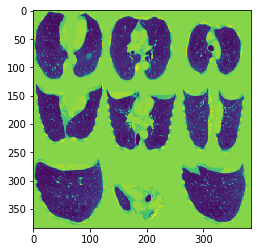

In [40]:
# for QA npy
from skimage import transform
npy_root = '/nfs/masi/MCL/DSB_File/prep/24186197235time20160921_clean.npy'
img = np.load(npy_root)[0]
img_size  = 128
img_shape = img.shape
new_img = np.zeros((3 * img_size, 3 * img_size))

tmp_dim = img_shape[0]
for i in range(3):
    tmp_ind = int(tmp_dim / 4 * (i +1))
    tmp_img = transform.resize(img[tmp_ind, :, :], (img_size, img_size))
    new_img[: img_size, i * img_size : (i+1) *img_size] = tmp_img
    
tmp_dim = img_shape[1]
for i in range(3):
    tmp_ind = int(tmp_dim / 4 * (i +1))
    tmp_img = transform.resize(img[:, tmp_ind,  :], (img_size, img_size))
    new_img[img_size : 2 * img_size, i * img_size : (i+1) *img_size] = tmp_img
    
tmp_dim = img_shape[2]
for i in range(3):
    tmp_ind = int(tmp_dim / 4 * (i +1))
    tmp_img = transform.resize(img[:,  :, tmp_ind], (img_size, img_size))
    new_img[2 * img_size : 3 * img_size, i * img_size : (i+1) *img_size] = tmp_img
    
plt.imshow(new_img)


In [ ]:
def single(img_path, img_save, img_size):
    img_nii = nb.load(img_path).get_data()
    print (img_nii.shape)
    new_img = np.zeros((4 * img_size, 4 * img_size))
    for i in range(4):
        for j in range(4):
            if i * 4 + j >= 15:
                break
            new_img[img_size * i : img_size* (i + 1), img_size * j : img_size* (j + 1)] = img_nii[i* 4 + j] 
    img = Image.fromarray(new_img)
    img = img.convert('RGB')
    img.save(img_save)
    
    

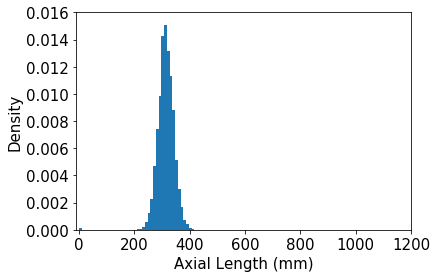

In [83]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/length.csv')
df = df.loc[df['length'] == df['length']]
length = df['length'].tolist()
plt.hist(length,  bins=50, density = True)  # `density=False` would make counts

#plt.title('VLSP packyear Histogram', fontsize =15 )
plt.ylabel('Density', fontsize =15)
plt.xlabel('Axial Length (mm)', fontsize =15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim((0,0.016))
plt.xlim((-10, 1200))
plt.savefig('/nfs/masi/MCL/xnat/MCL_lenbody.eps')

In [98]:
df = pd.read_csv('/nfs/masi/NLST/QA_results/20200513/noncancer/length.csv')
df = df.loc[df['length'] == df['length']]
df = df.query('length < 200 or length > 500')
print (len(df))

         subj                         sess      length
55     128104    01-02-1999-NLST-LSS-57651    0.000000
269    134144    01-02-2000-NLST-LSS-41007  156.600000
370    200205  01-02-1999-NLST-ACRIN-66283  171.000000
405    131514    01-02-1999-NLST-LSS-95555  175.000000
1325   105213    01-02-2001-NLST-LSS-35545    0.000000
2002   204806  01-02-1999-NLST-ACRIN-65413  134.000016
2814   123428    01-02-2001-NLST-LSS-00075    0.000000
3296   107342    01-02-2001-NLST-LSS-36736    0.000000
3945   202962  01-02-2000-NLST-ACRIN-62789    0.000000
4081   110135    01-02-1999-NLST-LSS-14247    0.000000
4094   131354    01-02-2000-NLST-LSS-78988    0.000000
4106   133940    01-02-1999-NLST-LSS-13537   80.000004
4158   128430    01-02-1999-NLST-LSS-45789   26.000000
5164   129606    01-02-2001-NLST-LSS-94978    0.000000
6777   103869    01-02-2000-NLST-LSS-27625    0.000000
7478   104411    01-02-2001-NLST-LSS-80572    0.000000
7545   108794    01-02-2001-NLST-LSS-12702    0.000000
7875   103

(-10, 1200)

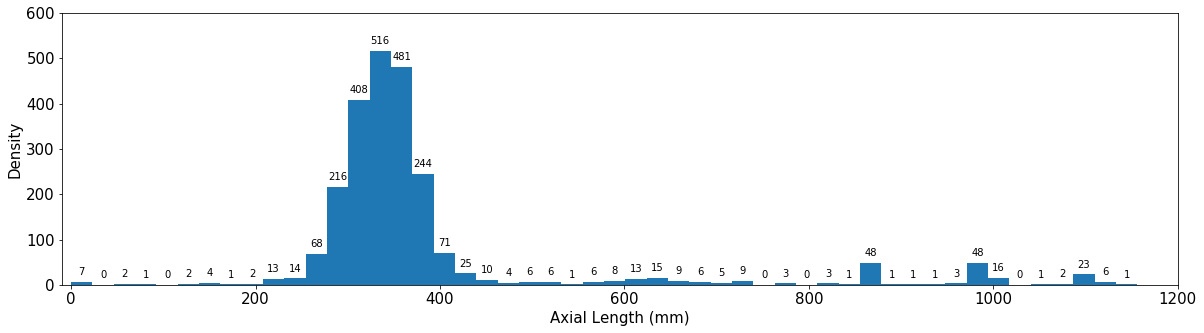

In [110]:
df = pd.read_csv('/nfs/masi/MCL/xnat/MCL_lenbody.csv')
df = df.loc[df['length'] == df['length']]
length = df['length'].tolist()
fig, ax = plt.subplots(figsize = (20, 5))
n, bins, patch = ax.hist(length,  bins=50, density = False)  # `density=False` would make counts
#print (n, len(n))
#print (patch)
#plt.title('VLSP packyear Histogram', fontsize =15 )
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

plt.ylabel('Density', fontsize =15)
plt.xlabel('Axial Length (mm)', fontsize =15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim((0,600))
plt.xlim((-10, 1200))
#plt.savefig('/nfs/masi/MCL/xnat/MCL_lenbody.eps')

In [99]:
df = pd.read_csv('/nfs/masi/MCL/xnat/MCL_lenbody.csv')
df = df.loc[df['length'] == df['length']]
df = df.query('length < 200 or length > 500')
print (len(df))

257
